In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from skimage import io, color, exposure, filters

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.optimizers import Adam

In [34]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.20.0


In [35]:
# Set parameters here 
INPUT_SIZE = 256 #324 try
BATCH_SIZE = 64

SEED = 12345
np.random.seed(SEED)

path = '/Users/gavmm/Documents/G/Projects_/Ritcher/CS/Main/Pneuno-new'
trainpath = path + '/train'
testpath = path + '/test'
validpath = path + '/valid'
classes = ['BACTERIAL', 'NORMAL', 'VIRAL']

NUMCLASSES = len(classes)

In [36]:
def preprocess(img):
    # if len(img.shape)==2:
    #     img = np.mean(img, axis = 2)

    img = img - np.min(img)
    img = img / np.max(img)
    
    img = img - np.mean(img)
    img = img / np.std(img)   
    return img
# img = img - np.mean(img)
# std = np.std(img)
# img = img / (std + 1e-8)

In [37]:
img = io.imread(trainpath+'/BACTERIAL/person1_bacteria_1.jpeg')
gray = preprocess(img)
gray.shape

(439, 712, 3)

In [38]:
print("Train path exists:", os.path.exists(trainpath))
print("Train path:", trainpath)

Train path exists: True
Train path: /Users/gavmm/Documents/G/Projects_/Ritcher/CS/Main/Pneuno-new/train


/var/folders/gz/kym35qmd5vlcvwk68h0k6mr80000gn/T/ipykernel_3933/4002959778.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gray)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9424759669896763..1.3152189966282808].


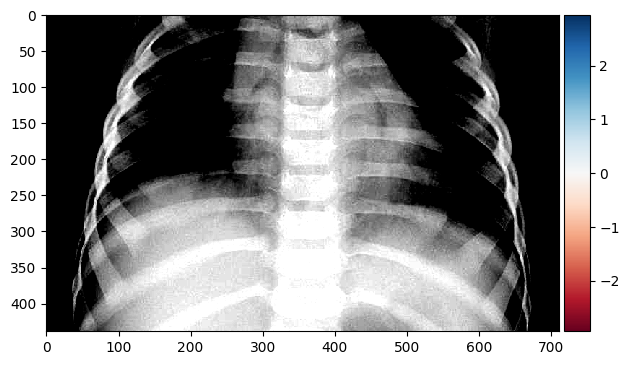

In [39]:
# gray = np.mean(img, axis=2)
io.imshow(gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9424759669896763..1.3152189966282808].


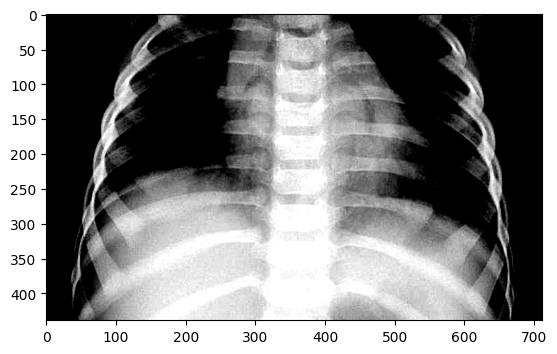

In [40]:
plt.imshow(gray, 'gray')

In [41]:
train_datagen = ImageDataGenerator(
                                featurewise_center=False,
                                samplewise_center=False,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=False,
                                zca_epsilon=1e-06,
                                rotation_range=5,
                                width_shift_range=0.05,
                                height_shift_range=0.05,
                                brightness_range=None,
                                shear_range=0.5,
                                zoom_range=0.05,
                                channel_shift_range=0.0,
                                fill_mode="nearest",
                                cval=0.0,
                                horizontal_flip=True,
                                vertical_flip=False,
                                rescale=None,
                                preprocessing_function=preprocess,
                                data_format=None,
                                validation_split=0.2,
                                dtype=None,
                            )


In [42]:
training_set = train_datagen.flow_from_directory(
                                            directory= trainpath,
                                            subset='training',
                                            target_size=(INPUT_SIZE,INPUT_SIZE),
                                            color_mode="grayscale",
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical",
                                            shuffle=True,
                                            seed=42
)

validation_set = train_datagen.flow_from_directory(
                                            directory= trainpath,
                                            subset='validation',
                                            target_size=(INPUT_SIZE,INPUT_SIZE),
                                            color_mode="grayscale",
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical",
                                            shuffle=True,
                                            seed=42
)

Found 4779 images belonging to 3 classes.
Found 1193 images belonging to 3 classes.


In [43]:
#from sklearn.model_selection import train_test_split
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Create a sequential model to add layers step by step
model = Sequential()

# Input layer that accepts grayscale images of shape
model.add(InputLayer(input_shape=[INPUT_SIZE,INPUT_SIZE,1])) #keras will internally add batch dimension

#
model.add(Conv2D(filters=32,kernel_size=7,strides=2,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same')) # downsample the feature maps
model.add(Dropout(0.4))# Dropout layer to prevent overfitting by randomly turning off 40% of neurons

model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))

# Flatten the 2D feature maps into a 1D vector before feeding into dense layers
model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(NUMCLASSES,activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/gavmm/Documents/G/Projects_/Ritcher/CS/Main/.venv/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331,459 (5.08 MB)

 Trainable params: 1,331,459 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training
epochs = 25
history = model.fit(training_set,
               epochs=epochs,
               validation_data=validation_set)

model.save_weights("model-normalized-feb-12.weights.h5")
print("Saved model to disk after",epochs,"epochs.")

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 375ms/step - accuracy: 0.4156 - loss: 1.0627 - val_accuracy: 0.5155 - val_loss: 0.9788
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 395ms/step - accuracy: 0.5886 - loss: 0.8298 - val_accuracy: 0.6982 - val_loss: 0.8003
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 391ms/step - accuracy: 0.6539 - loss: 0.7222 - val_accuracy: 0.8139 - val_loss: 0.6908
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 0.6851 - loss: 0.6706 - val_accuracy: 0.8567 - val_loss: 0.5089
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 383ms/step - accuracy: 0.7144 - loss: 0.6246 - val_accuracy: 0.7770 - val_loss: 0.5608
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 383ms/step - accuracy: 0.7248 - loss: 0.6133 - val_accuracy: 0.8516 - val_loss: 0.4881
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 0.7514 - loss: 0.5667 - val_accuracy: 0.8550 - val_loss: 0.4648
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 382ms/step - accuracy: 0.7409 - loss: 0.5704 - val_accu

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

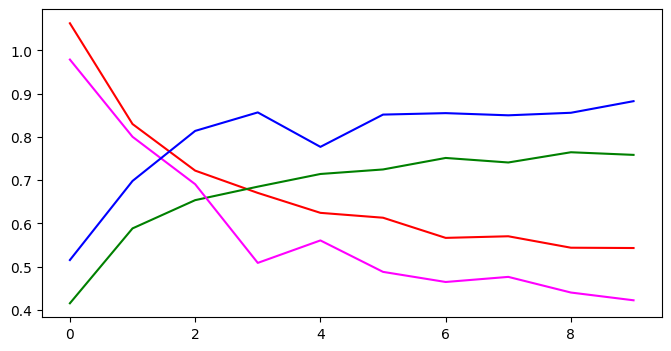

In [46]:
fig = plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_loss'],color='magenta')
plt.plot(history.history['val_accuracy'],color='blue')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Real class: NORMAL
Predictions:
NORMAL : 0.8483701
VIRAL : 0.10411584
BACTERIAL : 0.047514036


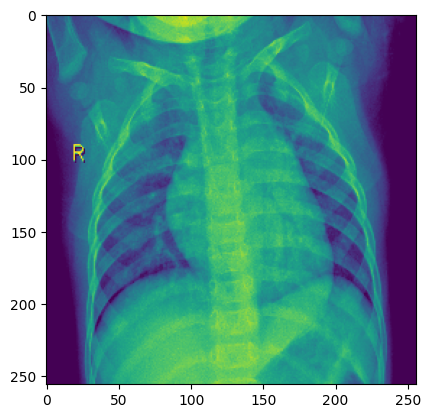

In [47]:
from skimage import io, transform, color, exposure
# Get random image
classnum = np.random.randint(NUMCLASSES)
folder = trainpath + '/' + classes[classnum]
filelist = os.listdir(folder)
i = np.random.randint(len(filelist))

while filelist[i].lower()=='thumbs.db':
    i = np.random.randint(len(filelist))

image_path = folder + '/' + filelist[i]
img = io.imread(image_path)

# Prepare image
img = cv2.resize(img,(INPUT_SIZE,INPUT_SIZE))
img = preprocess(img)


plt.imshow(img)
# plt.plot(exposure.histogram(img)[0])
img_tensor = np.expand_dims(img, axis=(0, -1))

# Print what the top predicted class is
# print(img_tensor)
preds = model.predict(img_tensor)
preds = preds.flatten()
# print("Output Probabilities:", preds)
order = np.argsort(preds)
order = order[::-1]

reverse_class_labels = {v: k for k, v in training_set.class_indices.items()}
print('Real class:', classes[classnum])
print('Predictions:')
for i in range(3):
    if preds[order[i]] == 0:
        break
    else:
        print(reverse_class_labels[order[i]], ':', preds[order[i]])

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: BACTERIAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: BACTERIAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: BACTERIAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: BACTERIAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: NORMAL
Real class: BACTERIAL	Prediction: VIRAL
Real class: BACTERIAL	Prediction: BACTERIAL
Real class:

array([404., 395., 394.])

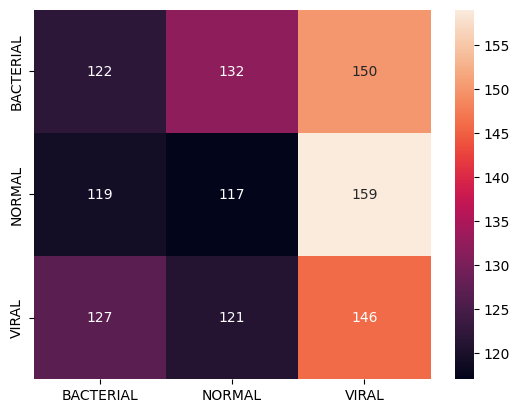

In [48]:
import seaborn as sn

testset = validation_set

predictions = model.predict(testset)

order = np.argsort(predictions)
conf = np.zeros([NUMCLASSES, NUMCLASSES])
count = 0

classcounts = np.zeros(NUMCLASSES)
for i in range(predictions.shape[0]):
    index = order[i,:]
    index = index[::-1]
    print('Real class:', reverse_class_labels[testset.labels[i]], end='\t')
    print('Prediction:',reverse_class_labels[index[0]])
    conf[testset.labels[i],index[0]] += 1
    classcounts[testset.labels[i]]+=1
    if testset.labels[i]==index[0]:
        count+=1
sn.heatmap(conf, annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
print(count)
classcounts    

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step


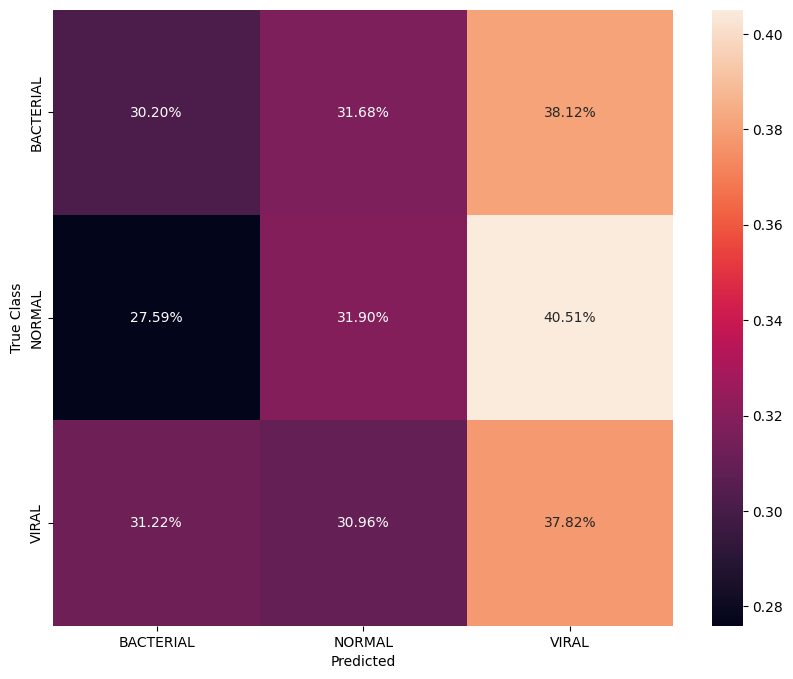

Total Correct: 397
Class Counts: [404. 395. 394.]


In [52]:
testset = validation_set

predictions = model.predict(testset)

order = np.argsort(predictions)
conf = np.zeros([NUMCLASSES, NUMCLASSES])
count = 0

classcounts = np.zeros(NUMCLASSES)
for i in range(predictions.shape[0]):
    index = order[i,:]
    index = index[::-1]
    # print('Real class:', reverse_class_labels[testset.labels[i]], end='\t')
    # print('Prediction:',reverse_class_labels[index[0]])
    conf[testset.labels[i],index[0]] += 1
    classcounts[testset.labels[i]]+=1
    if testset.labels[i]==index[0]:
        count+=1

# --- CHANGE STARTS HERE ---

# 1. Normalize the confusion matrix
# Divide each row by the total count of that class (classcounts)
# We use [:, None] to allow division of the 2D matrix by the 1D array
conf_percent = conf / classcounts[:, None]

# 2. Update Heatmap
# fmt='.2%' tells python to format the number 0.5 as 50.00%
plt.figure(figsize=(10, 8)) # Optional: Make plot larger
sn.heatmap(conf_percent, annot=True, fmt='.2%', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True Class')
plt.show()

# --- CHANGE ENDS HERE ---

print(f"Total Correct: {count}")
print(f"Class Counts: {classcounts}")

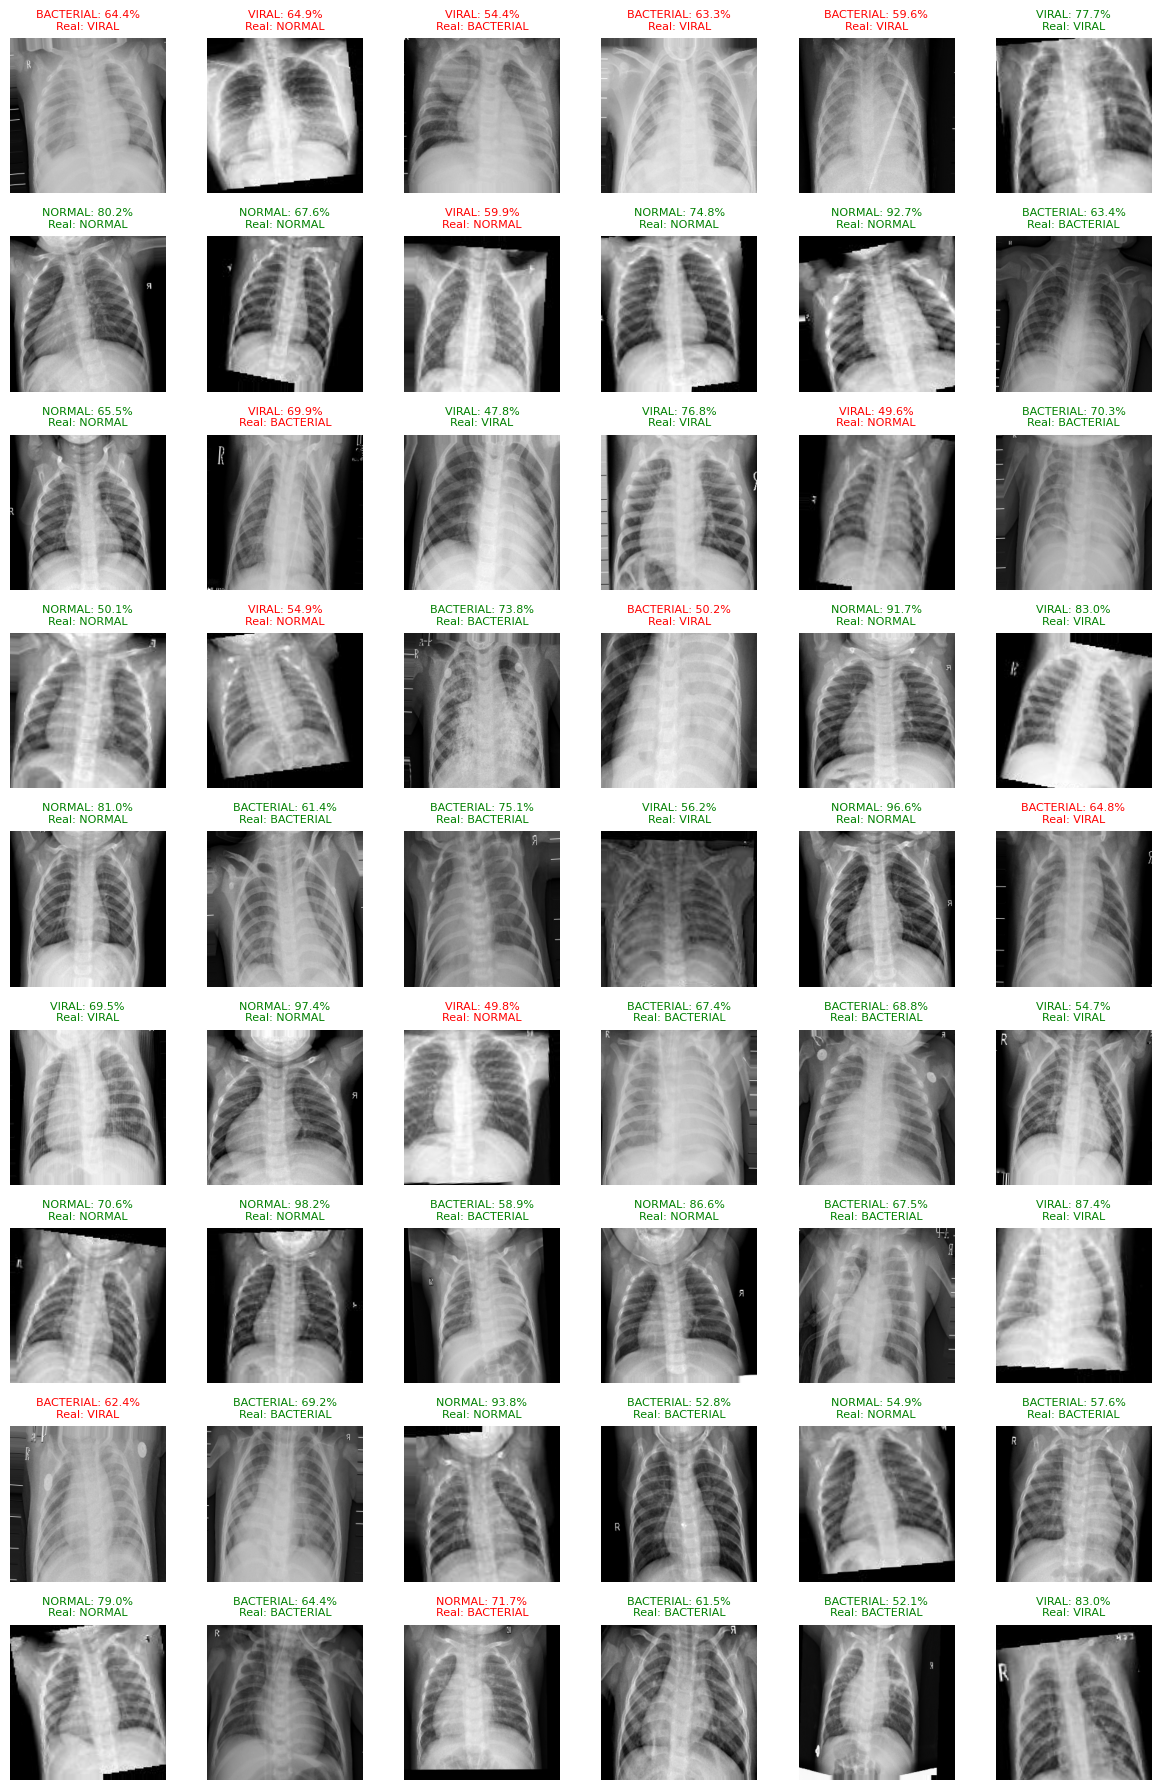

In [50]:
# Get one batch of training images and labels
images, labels = next(training_set)

# Limit to N images to show
N = 54
fig = plt.figure(figsize=(12, 18))

for i in range(min(N, images.shape[0])):
    ax = fig.add_subplot(9, 6, i+1)

    # Prepare image for prediction
    img = images[i]
    img_input = img.reshape(1, INPUT_SIZE, INPUT_SIZE, 1)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_input, verbose=0)
    predicted_class_index = np.argmax(prediction)
    real_label = classes[np.argmax(labels[i])]
    confidence = np.max(prediction) * 100

    # Get predicted label name
    real_label = classes[np.argmax(labels[i])]
    predicted_label = classes[predicted_class_index]

    # Show image with predicted label
    ax.imshow(img.squeeze(), cmap='gray')
    color = 'green' if predicted_label == real_label else 'red'
    ax.set_title(f"{predicted_label}: {confidence:.1f}%\nReal: {real_label}", fontsize=8, color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()
